# LIB

In [ ]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
#from tensorflow.examples.tutorials.mnist import input_data
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# FUCTION

In [ ]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# DATA

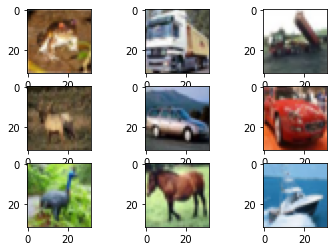

In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

#check img
# index = 2
# img = x_test[index]
# plt.imshow(img)

In [ ]:
# set up image augmentation
# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

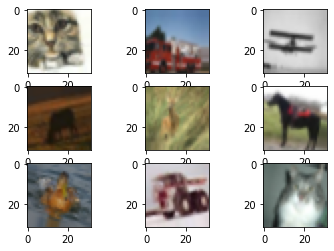

In [ ]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [ ]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [ ]:
# labels
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# val_data
ids= np.random.choice(50000, 10000, replace= False)
idsTrain= [i for i in range(50000) if i not in ids]
idsTrain, ids
x_val= x_train[ids]
y_val= y_train[ids]
x_train= x_train[idsTrain]
y_train= y_train[idsTrain]

# BUILD IMPROVE MODEL

In [ ]:
num_filters2=32
ac2='relu'
adm2=Adam(learning_rate =0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0.2

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

# TRAIN NEW MODEL

In [ ]:
LOAD MODEL

In [ ]:
# model2 = tf.keras.models.load_model('cifar10_model.h5')

In [ ]:
TRAIN MODEL

In [ ]:
modelCheckpoint = ModelCheckpoint('cifar10_02_12.h5', 
                                   monitor='val_accuracy', 
                                   save_best_only=True, 
                                   verbose=0)

In [ ]:
# train with image augmentation
history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size= 128),
                              steps_per_epoch = len(x_train) / 128, epochs= 200, validation_data=(x_val, y_val),
                              callbacks = [modelCheckpoint, EarlyStopping(monitor='loss', patience=5)])

Epoch 1/200


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2752\2848990701.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size= 128),


312/312 [==============================] - 191s 607ms/step - loss: 1.8282 - accuracy: 0.4029 - val_loss: 1.9982 - val_accuracy: 0.3415
Epoch 2/200
312/312 [==============================] - 200s 639ms/step - loss: 1.2817 - accuracy: 0.5425 - val_loss: 1.0726 - val_accuracy: 0.6155
Epoch 3/200
312/312 [==============================] - 197s 630ms/step - loss: 1.0763 - accuracy: 0.6165 - val_loss: 0.8688 - val_accuracy: 0.6950
Epoch 4/200
312/312 [==============================] - 199s 637ms/step - loss: 0.9564 - accuracy: 0.6618 - val_loss: 0.9133 - val_accuracy: 0.6892
Epoch 5/200
312/312 [==============================] - 193s 616ms/step - loss: 0.8790 - accuracy: 0.6919 - val_loss: 0.8348 - val_accuracy: 0.7186
Epoch 6/200
312/312 [==============================] - 181s 581ms/step - loss: 0.8192 - accuracy: 0.7126 - val_loss: 0.7238 - val_accuracy: 0.7495
Epoch 7/200
312/312 [==============================] - 184s 588ms/step - loss: 0.7678 - accuracy: 0.7325 - val_loss: 0.6645 - val_

312/312 [==============================] - 184s 590ms/step - loss: 0.2271 - accuracy: 0.9200 - val_loss: 0.3386 - val_accuracy: 0.8921
Epoch 112/200
312/312 [==============================] - 173s 554ms/step - loss: 0.2277 - accuracy: 0.9199 - val_loss: 0.3400 - val_accuracy: 0.8947
Epoch 113/200
312/312 [==============================] - 171s 547ms/step - loss: 0.2234 - accuracy: 0.9211 - val_loss: 0.3743 - val_accuracy: 0.8861
Epoch 114/200
312/312 [==============================] - 171s 547ms/step - loss: 0.2276 - accuracy: 0.9187 - val_loss: 0.3886 - val_accuracy: 0.8813
Epoch 115/200
312/312 [==============================] - 175s 559ms/step - loss: 0.2255 - accuracy: 0.9202 - val_loss: 0.3894 - val_accuracy: 0.8824
Epoch 116/200
312/312 [==============================] - 181s 579ms/step - loss: 0.2337 - accuracy: 0.9178 - val_loss: 0.3457 - val_accuracy: 0.8906
Epoch 117/200
312/312 [==============================] - 183s 586ms/step - loss: 0.2230 - accuracy: 0.9216 - val_loss: 0

SAVE

In [ ]:
model2.save('cifar10_model.h5')     

# CHECK NEW MODEL

In [ ]:
model2_test_acc=model2.evaluate(x_test,y_test,batch_size=128)
model2_test_acc

79/79 [==============================] - 10s 128ms/step - loss: 0.3711 - accuracy: 0.8916


[0.37114182114601135, 0.8916000127792358]

In [ ]:
model2_train_acc=model2.evaluate(x_train,y_train,batch_size=128)
model2_train_acc

313/313 [==============================] - 39s 125ms/step - loss: 0.0793 - accuracy: 0.9741


[0.07925362139940262, 0.9740750193595886]

# LOSS NEW MODEL

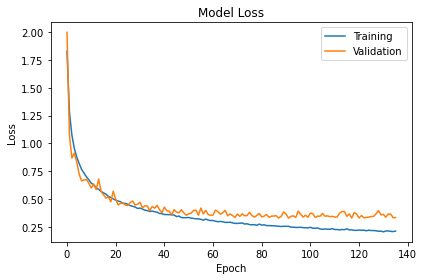

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# ACCURACY NEW MODEL


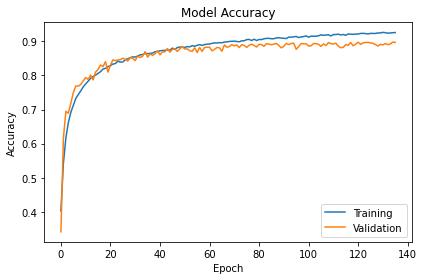

In [ ]:
#plt.subplot(400)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

# TEST

TEST 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


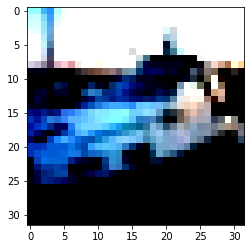

In [ ]:
index = 2
img = x_test[index]
plt.imshow(img)

In [ ]:
img = img.reshape(1,32,32,3)
y_hat = model2.predict(img)
np.argmax(y_hat)

1/1 [==============================] - 0s 375ms/step


8

TEST 2

In [ ]:
import imageio
import cv2

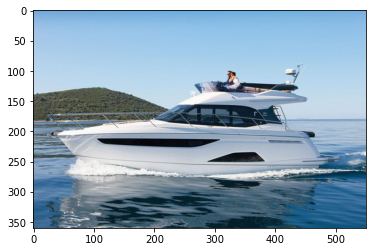

In [ ]:
img = imageio.imread('ship1.jpg')
plt.imshow(img)

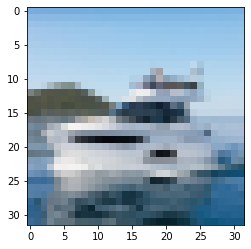

In [ ]:
img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype("float32")  
mean = np.mean(img)
std = np.std(img)
img = (img-mean)/std

In [ ]:
y_hat = model2.predict(img)
np.argmax(y_hat)

1/1 [==============================] - 0s 16ms/step


8

TEST 3

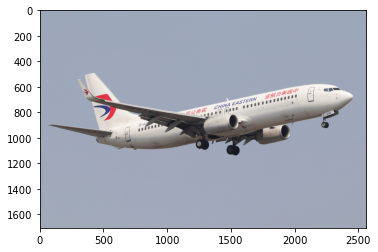

In [ ]:
img = imageio.imread('plane1.jpg')
plt.imshow(img)

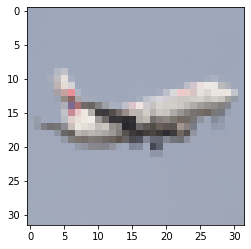

In [ ]:
img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype("float32")  
mean = np.mean(img)
std = np.std(img)
img = (img-mean)/std

In [ ]:
y_hat = model2.predict(img)
np.argmax(y_hat)

1/1 [==============================] - 0s 31ms/step


0

TEST 4

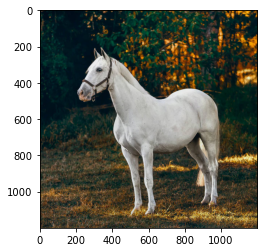

In [ ]:
img = imageio.imread('horse1.jpg')
plt.imshow(img)

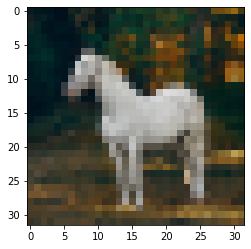

In [ ]:
img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype("float32")  
mean = np.mean(img)
std = np.std(img)
img = (img-mean)/std

In [ ]:
y_hat = model2.predict(img)
np.argmax(y_hat)

1/1 [==============================] - 0s 16ms/step


7

TEST 5

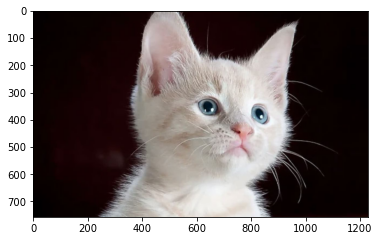

In [ ]:
img = imageio.imread('cat1.jpg')
plt.imshow(img)

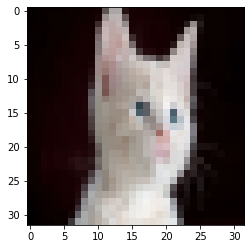

In [ ]:
img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
plt.imshow(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype("float32")  
mean = np.mean(img)
std = np.std(img)
img = (img-mean)/std

In [ ]:
y_hat = model2.predict(img)
np.argmax(y_hat)

1/1 [==============================] - 0s 16ms/step


3